**Benedictus Bayu Pramudhito**

# Machine Learning

---



## **1. Breast-cancer-wisconsin**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
print('\n'.join(os.listdir(r'./drive/My Drive/Colab Test (Bootcamp ML 2020)/Quiz')))

breast-cancer-wisconsin.xlsx
cancer.csv
breast-cancer-wisconsin.csv
breast-cancer-wisconsin.names
banknote.csv
banknote.names
Quiz_A.ipynb
.DS_Store
banknote.xlsx
columns banknote.csv


In [ ]:
df = pd.read_csv(r'./drive/My Drive/Colab Test (Bootcamp ML 2020)/Quiz/cancer.csv')
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.shape

(699, 10)

In [ ]:
print(df.isnull().sum())
print('\nTerdapat {} Missing Values pada Dataset'.format(df.isnull().sum().sum()))

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

Terdapat 0 Missing Values pada Dataset


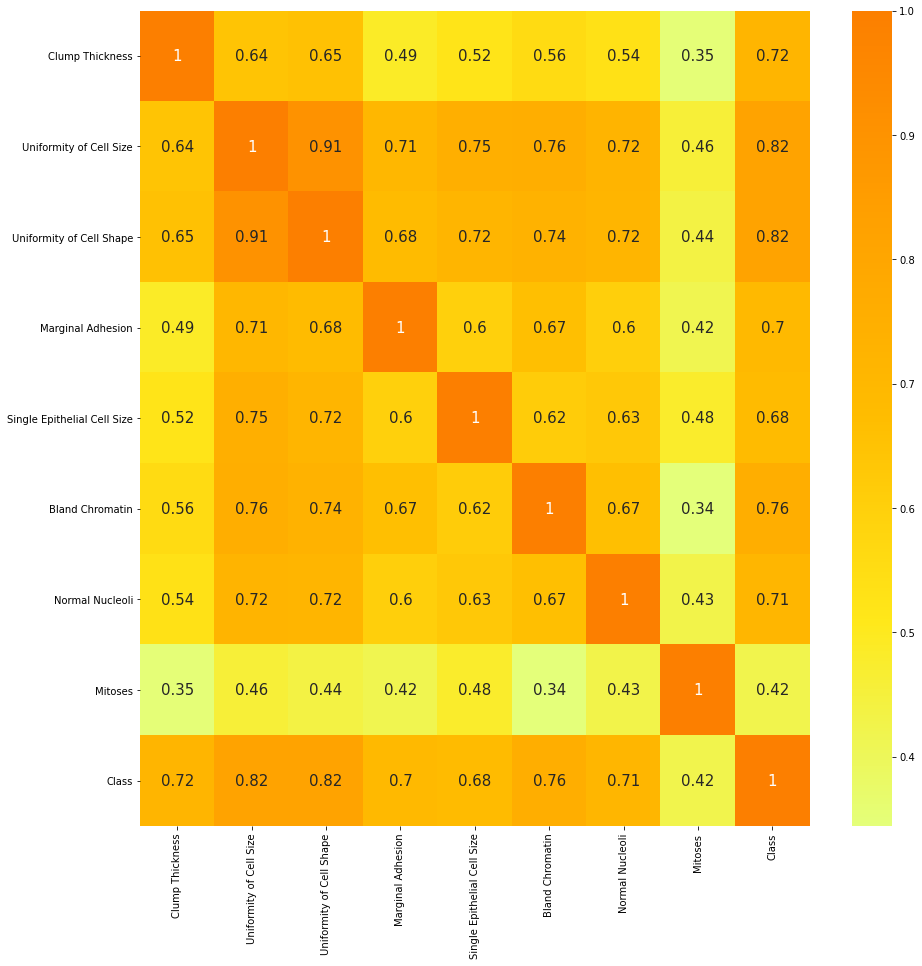

In [ ]:
#Cek korelasi dari tiap atribut terhadap targetnya
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, annot_kws={'size' : 15}, cmap='Wistia')
plt.show()

Terdapat korelasi yang tinggi antara kolom atribut dengan targetnya (Class)

In [ ]:
df.dtypes

Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [ ]:
df.drop(columns='Bare Nuclei', axis=1,inplace=True)

df.dtypes

Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [ ]:
#Mengganti isi dari kolom Class menjadi B dan M
df['Class'] = df['Class'].replace(2, 'B')
df['Class'] = df['Class'].replace(4, 'M')

df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,3,1,1,B
1,5,4,4,5,7,3,2,1,B
2,3,1,1,1,2,3,1,1,B
3,6,8,8,1,3,3,7,1,B
4,4,1,1,3,2,3,1,1,B


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bland Chromatin              699 non-null    int64 
 6   Normal Nucleoli              699 non-null    int64 
 7   Mitoses                      699 non-null    int64 
 8   Class                        699 non-null    object
dtypes: int64(8), object(1)
memory usage: 49.3+ KB


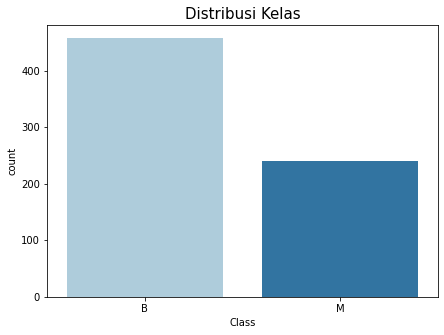

In [ ]:
#Cek distribusi kelas
plt.figure(figsize=(7, 5))
sns.countplot(df['Class'], palette='Paired')
plt.title('Distribusi Kelas', fontsize=15)
plt.show()

**Machine Learning Model**

**Data Preprocessing**

In [ ]:
#Akan digunakan 3 algoritma
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, classification_report

In [ ]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [ ]:
#Memakai standard scaler sebagai preprocessornya
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.values)

In [ ]:
#Train test split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((559, 8), (140, 8), (559,), (140,))

**SVM**

In [ ]:
#Hyperparameter tuning
types = ['rbf', 'poly', 'linear']
for i in types:
  svmc = SVC(kernel=i)
  svmc.fit(X_train, y_train)
  prediksi_svc = svmc.predict(X_train)
  prediksi_svc_test = svmc.predict(X_test)
  y_pred_svm = svmc.predict(X_test)
  cm = confusion_matrix(y_test, y_pred_svm)
  print('Nilai Akurasi SVC pada Training Set dengan Kernel = {}'.format(i), 'adalah', round(accuracy_score(prediksi_svc, y_train), 2))
  print('Nilai Akurasi SVC pada Testing Set dengan Kernel = {}'.format(i), 'adalah', round(accuracy_score(prediksi_svc_test, y_test), 2))
  print('Precision Score kernel = {} adalah {}'.format(i, precision_score(y_test, y_pred_svm, average='macro')))
  print('F1 Score kernel = {} adalah {}'.format(i, f1_score(y_test, y_pred_svm, average='macro')))
  print('Recall Score kernel = {} adalah {}'.format(i, recall_score(y_test, y_pred_svm, average='macro')))
  #print(classification_report(y_test, y_pred_svm))
  #print(cm)
  print('=======================================================================================================================================')

Nilai Akurasi SVC pada Training Set dengan Kernel = rbf adalah 0.97
Nilai Akurasi SVC pada Testing Set dengan Kernel = rbf adalah 0.96
Precision Score kernel = rbf adalah 0.9567530064754857
F1 Score kernel = rbf adalah 0.9592999592999593
Recall Score kernel = rbf adalah 0.9619883040935673
Nilai Akurasi SVC pada Training Set dengan Kernel = poly adalah 0.95
Nilai Akurasi SVC pada Testing Set dengan Kernel = poly adalah 0.96
Precision Score kernel = poly adalah 0.9702970297029703
F1 Score kernel = poly adalah 0.9489795918367347
Recall Score kernel = poly adalah 0.9333333333333333
Nilai Akurasi SVC pada Training Set dengan Kernel = linear adalah 0.96
Nilai Akurasi SVC pada Testing Set dengan Kernel = linear adalah 0.96
Precision Score kernel = linear adalah 0.9567530064754857
F1 Score kernel = linear adalah 0.9592999592999593
Recall Score kernel = linear adalah 0.9619883040935673


Setelah dilakukan hyparameter tuning, diperoleh hasil bahwa ketiga kernel pada SVM memberikan nilai akurasi yang sama persis dengan nilai f1 score, recall score, dan precision score yang tidak terlalu jauh bedanya sehingga ketiga kernel ini dapat memberikan hasil evaluasi yang baik pada dataset

**KNN**

Memakai hyperparameter tuning untuk setiap metrics (accuracy, f1, recall, precision)

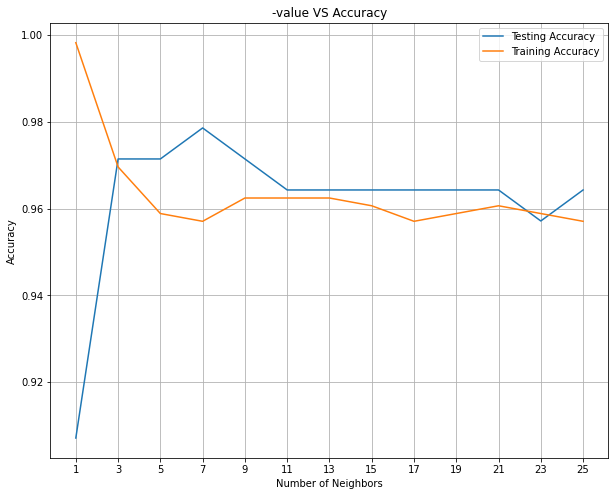


Nilai Akurasi terbaik untuk Model KNN adalah 0.98


In [ ]:
neig = np.arange(1, 26, 2)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  train_accuracy.append(knn.score(X_train, y_train))
  test_accuracy.append(knn.score(X_test, y_test))

plt.figure(figsize=[10,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.grid()
plt.show()
print("\nNilai Akurasi terbaik untuk Model KNN adalah {}".format(round(np.max(test_accuracy), 2)))

Nilai akurasi terbaik untuk model KNN diperoleh dengan K=7

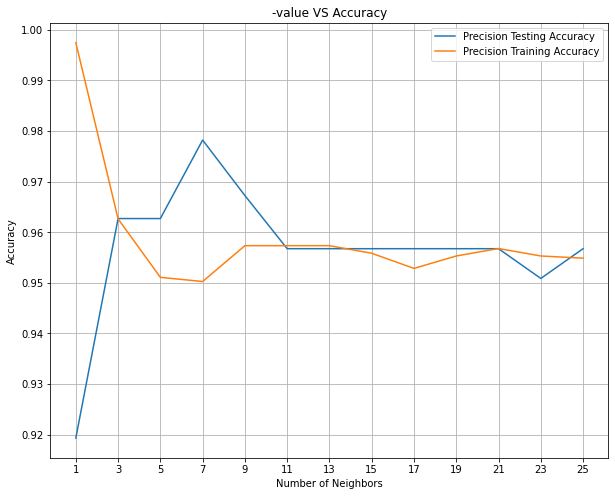


Nilai Precision terbaik untuk Model KNN adalah 0.98


In [ ]:
neig = np.arange(1, 26, 2)
precision_train_accuracy = []
precision_test_accuracy = []

for i, k in enumerate(neig):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  prediksi_knn_train = knn.predict(X_train)
  prediksi_knn_test = knn.predict(X_test)
  precision_train_accuracy.append(precision_score(y_train, prediksi_knn_train, average='macro'))
  precision_test_accuracy.append(precision_score(y_test, prediksi_knn_test, average='macro'))

plt.figure(figsize=[10,8])
plt.plot(neig, precision_test_accuracy, label = 'Precision Testing Accuracy')
plt.plot(neig, precision_train_accuracy, label = 'Precision Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.grid()
plt.show()
print("\nNilai Precision terbaik untuk Model KNN adalah {}".format(round(np.max(precision_test_accuracy), 2)))

Nilai precision score terbaik untuk KNN diperoleh dengan K=7

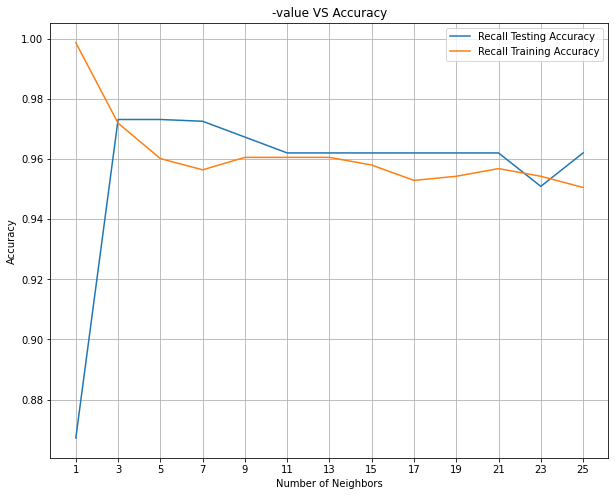


Nilai Recall Score terbaik untuk Model KNN adalah 0.97


In [ ]:
neig = np.arange(1, 26, 2)
recall_train_accuracy = []
recall_test_accuracy = []

for i, k in enumerate(neig):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  prediksi_knn_train = knn.predict(X_train)
  prediksi_knn_test = knn.predict(X_test)
  recall_train_accuracy.append(recall_score(y_train, prediksi_knn_train, average='macro'))
  recall_test_accuracy.append(recall_score(y_test, prediksi_knn_test, average='macro'))

plt.figure(figsize=[10,8])
plt.plot(neig, recall_test_accuracy, label = 'Recall Testing Accuracy')
plt.plot(neig, recall_train_accuracy, label = 'Recall Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.grid()
plt.show()
print("\nNilai Recall Score terbaik untuk Model KNN adalah {}".format(round(np.max(recall_test_accuracy),2)))

Nilai Recall score terbaik untuk KNN diperoleh dengan K= 3, 5, dan 7

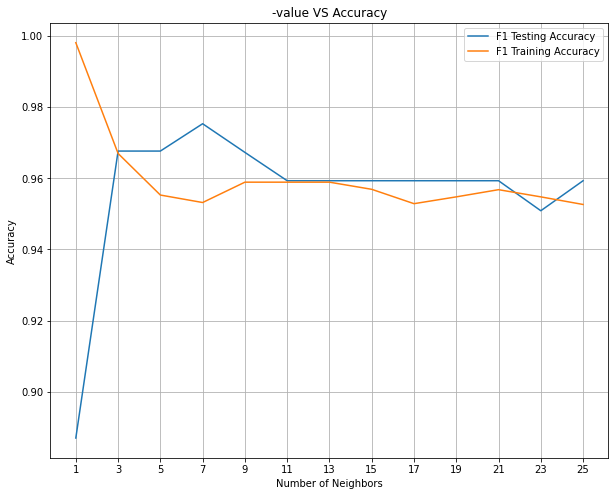


Nilai F1 Score terbaik untuk Model KNN adalah 0.98


In [ ]:
neig = np.arange(1, 26, 2)
f1_train_accuracy = []
f1_test_accuracy = []

for i, k in enumerate(neig):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  prediksi_knn_train = knn.predict(X_train)
  prediksi_knn_test = knn.predict(X_test)
  f1_train_accuracy.append(f1_score(y_train, prediksi_knn_train, average='macro'))
  f1_test_accuracy.append(f1_score(y_test, prediksi_knn_test, average='macro'))

plt.figure(figsize=[10,8])
plt.plot(neig, f1_test_accuracy, label = 'F1 Testing Accuracy')
plt.plot(neig, f1_train_accuracy, label = 'F1 Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.grid()
plt.show()
print("\nNilai F1 Score terbaik untuk Model KNN adalah {}".format(round(np.max(f1_test_accuracy),2)))

Nilai F1 Score terbaik diperoleh dengan nilai K = 7

In [ ]:
estimator = [50, 100, 200, 300]
for i in estimator:
  rf = RandomForestClassifier(n_estimators=i, max_depth=5)
  rf.fit(X_train, y_train)
  prediksi_rf = rf.predict(X_train)
  prediksi_rf_test = rf.predict(X_test)
  y_pred_rf = rf.predict(X_test)
  cm = confusion_matrix(y_test, y_pred_rf)
  print('Nilai Akurasi Random Forest pada Training Set dengan n_estimator = {}'.format(i), 'adalah', round(accuracy_score(prediksi_rf, y_train), 2))
  print('Nilai Akurasi Random Forest pada Testing Set dengan n_estimator = {}'.format(i), 'adalah', round(accuracy_score(prediksi_rf_test, y_test), 2))
  print('Precision Score dengan n_estimator = {} adalah {}'.format(i, precision_score(y_test, y_pred_rf, average='macro')))
  print('F1 Score dengan n_estimator = {} adalah {}'.format(i, f1_score(y_test, y_pred_rf, average='macro')))
  print('Recall Score dengan n_estimator = {} adalah {}'.format(i, recall_score(y_test, y_pred_rf, average='macro')))
  #print(classification_report(y_test, y_pred_rf))
  #print(cm)
  print('=======================================================================================================================================')

Nilai Akurasi Random Forest pada Training Set dengan n_estimator = 50 adalah 0.97
Nilai Akurasi Random Forest pada Testing Set dengan n_estimator = 50 adalah 0.97
Precision Score dengan n_estimator = 50 adalah 0.9627087622969572
F1 Score dengan n_estimator = 50 adalah 0.967622571692877
Recall Score dengan n_estimator = 50 adalah 0.9730994152046784
Nilai Akurasi Random Forest pada Training Set dengan n_estimator = 100 adalah 0.98
Nilai Akurasi Random Forest pada Testing Set dengan n_estimator = 100 adalah 0.97
Precision Score dengan n_estimator = 100 adalah 0.9627087622969572
F1 Score dengan n_estimator = 100 adalah 0.967622571692877
Recall Score dengan n_estimator = 100 adalah 0.9730994152046784
Nilai Akurasi Random Forest pada Training Set dengan n_estimator = 200 adalah 0.98
Nilai Akurasi Random Forest pada Testing Set dengan n_estimator = 200 adalah 0.97
Precision Score dengan n_estimator = 200 adalah 0.9627087622969572
F1 Score dengan n_estimator = 200 adalah 0.967622571692877
Reca

Nilai hasil evaluasi metrics (accuracy, f1 score, precision score, dan recall score) terbaik untuk model Support Vector Classifier diperoleh dengan n_estimator 100 dan 200

## **2. Dataset Banknote**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
print('\n'.join(os.listdir(r'./drive/My Drive/Colab Test (Bootcamp ML 2020)/Quiz')))

breast-cancer-wisconsin.xlsx
cancer.csv
breast-cancer-wisconsin.csv
breast-cancer-wisconsin.names
banknote.csv
banknote.names
Quiz_A.ipynb
.DS_Store
banknote.xlsx
columns banknote.csv


In [ ]:
df = pd.read_csv(r'./drive/My Drive/Colab Test (Bootcamp ML 2020)/Quiz/columns banknote.csv')
df.head()

,variance of Wavelet Transformed image,skewness of Wavelet Transformed image,curtosis of Wavelet Transformed image,entropy of image,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
df.shape

(1372, 5)

In [ ]:
df.dtypes

variance of Wavelet Transformed image    float64
skewness of Wavelet Transformed image    float64
curtosis of Wavelet Transformed image    float64
entropy of image                         float64
class                                      int64
dtype: object

In [ ]:
df.describe()

,variance of Wavelet Transformed image,skewness of Wavelet Transformed image,curtosis of Wavelet Transformed image,entropy of image,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


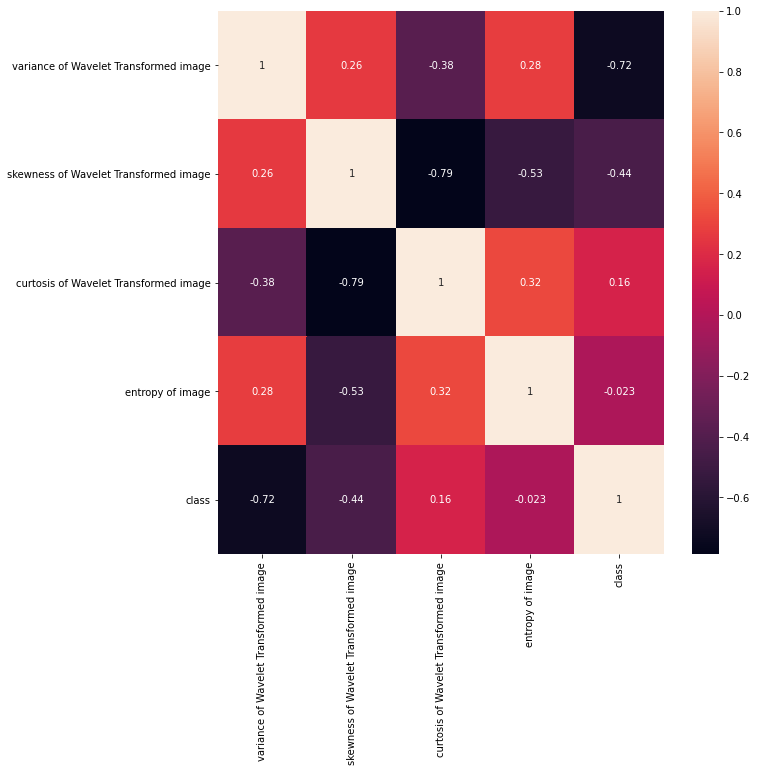

In [ ]:
#Cek korelasi antar atribut terhadap targetnya
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, annot_kws={'size':10})
plt.show()

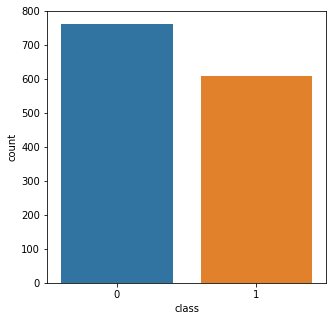

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(df['class'])
plt.show()

**Machine Learning Model**

**Data Preprocessing**

In [ ]:
#Akan digunakan 3 algoritma
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
X = df.drop(['class'], axis=1)
y = df['class']

In [ ]:
stdr = StandardScaler()
X_stdr = stdr.fit_transform(X.values)
y_stdr = stdr.fit_transform(df['class'].values.reshape(-1, 1)).flatten()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_stdr, y_stdr, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1097, 4), (275, 4), (1097,), (275,))

**Linear Regression**

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
prediksi_linreg = linreg.predict(X_test)

In [ ]:
linreg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [ ]:
linreg = LinearRegression(normalize=True)
linreg.fit(X_train, y_train)
prediksi_linreg = linreg.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, prediksi_linreg)
mae = mean_absolute_error(y_test, prediksi_linreg)
r2 = r2_score(y_test, prediksi_linreg)
print('MSE (Mean Squared Error) Using Standard Scaler is  :', mse)
print('MAE (Mean Absolute Error) Using Standard Scaler is :', mae)
print('r^2 score Using Standard Scaler is                 :', r2)
print('RMSE (Root Mean Squared Error) is                  :', np.sqrt(mean_squared_error(y_test, prediksi_linreg)))

MSE (Mean Squared Error) Using Standard Scaler is  : 0.1356597638793747
MAE (Mean Absolute Error) Using Standard Scaler is : 0.27250722311959014
r^2 score Using Standard Scaler is                 : 0.865219335956345
RMSE (Root Mean Squared Error) is                  : 0.36832019206035216


**Support Vector Regressor**

In [ ]:
#Lakukan hyperparameter tuning
types = ['rbf', 'poly', 'linear']
for i in types:
  svr = SVR(kernel=i)
  svr.fit(X_train, y_train)
  prediksi_svr = svr.predict(X_train)
  prediksi_svr_test = svr.predict(X_test)
  mse = mean_squared_error(y_test, prediksi_svr_test)
  mae = mean_absolute_error(y_test, prediksi_svr_test)
  r2 = r2_score(y_test, prediksi_svr_test)
  print('MSE (Mean Squared Error) Using Standard Scaler is  :', mse)
  print('MAE (Mean Absolute Error) Using Standard Scaler is :', mae)
  print('r^2 score Using Standard Scaler is                 :', r2)
  print('Nilai RMSE SVC dengan Kernel = {} adalah {}'.format(i, np.sqrt(mean_squared_error(y_test, prediksi_svr_test))))
  print('========================================================================================================================')

MSE (Mean Squared Error) Using Standard Scaler is  : 0.0348537942546939
MAE (Mean Absolute Error) Using Standard Scaler is : 0.12276825264720763
r^2 score Using Standard Scaler is                 : 0.965372064643533
Nilai RMSE SVC dengan Kernel = rbf adalah 0.18669170912146554
MSE (Mean Squared Error) Using Standard Scaler is  : 0.3677587866537798
MAE (Mean Absolute Error) Using Standard Scaler is : 0.4826055721877752
r^2 score Using Standard Scaler is                 : 0.6346243568788839
Nilai RMSE SVC dengan Kernel = poly adalah 0.606431188721177
MSE (Mean Squared Error) Using Standard Scaler is  : 0.1355259276946136
MAE (Mean Absolute Error) Using Standard Scaler is : 0.26729855797906643
r^2 score Using Standard Scaler is                 : 0.8653523048583933
Nilai RMSE SVC dengan Kernel = linear adalah 0.36813846266671674


Model SVR dengan kernel rbf memberikan nilai MSE, MAE, R2, dan RMSE yang terbaik pada dataset

**Random Forest Regressor**

In [ ]:
rf = RandomForestRegressor()
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [ ]:
random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features, 
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'bootstrap' : bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [ ]:
rf = RandomForestRegressor(n_estimators=400, bootstrap=False, max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2)
rf.fit(X_train, y_train)
prediksi_rf = rf.predict(X_train)
prediksi_rf_test = rf.predict(X_test)
r2 = r2_score(y_test, prediksi_rf_test)
mse = mean_squared_error(y_test, prediksi_rf_test)
mae = mean_absolute_error(y_test, prediksi_rf_test)
print('MSE (Mean Squared Error) Using Standard Scaler is            :', mse)
print('MAE (Mean Absolute Error) Using Standard Scaler is           :', mae)
print('r^2 score Using Standard Scaler is                           :', r2)
print('RMSE untuk model Random Forest dengan n_estimator 400 adalah :', np.sqrt(mean_squared_error(y_test, prediksi_rf_test)))

MSE (Mean Squared Error) Using Standard Scaler is            : 0.020924643012544646
MAE (Mean Absolute Error) Using Standard Scaler is           : 0.038564670900879
r^2 score Using Standard Scaler is                           : 0.9792109524632898
RMSE untuk model Random Forest dengan n_estimator 400 adalah : 0.14465352748047539


**RF**
1. MSE (Mean Squared Error) Using Standard Scaler is            : **0.020924643012544646**
2. MAE (Mean Absolute Error) Using Standard Scaler is           : **0.038564670900879**
3. r^2 score Using Standard Scaler is                           : **0.9792109524632898**
4. RMSE untuk model Random Forest dengan n_estimator 400 adalah : **0.14465352748047539**

**SVR**
1. MSE (Mean Squared Error) Using Standard Scaler is  : 0.0348537942546939
2. MAE (Mean Absolute Error) Using Standard Scaler is : 0.12276825264720763
3. r^2 score Using Standard Scaler is                 : 0.965372064643533
4. Nilai RMSE SVC dengan Kernel = rbf adalah 0.18669170912146554

**Linear Regression**
1. MSE (Mean Squared Error) Using Standard Scaler is  : 0.1356597638793747
2. MAE (Mean Absolute Error) Using Standard Scaler is : 0.27250722311959014
3. r^2 score Using Standard Scaler is                 : 0.865219335956345
4. RMSE (Root Mean Squared Error) is                  : 0.36832019206035216


Model terbaik diperoleh dengan algoritma Random Forest Regressor

## **Dataset Horse**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
print('\n'.join(os.listdir(r'./drive/My Drive/Colab Test (Bootcamp ML 2020)/Quiz')))

breast-cancer-wisconsin.xlsx
cancer.csv
breast-cancer-wisconsin.csv
breast-cancer-wisconsin.names
banknote.csv
banknote.names
Quiz_A.ipynb
.DS_Store
banknote.xlsx
columns banknote.csv
horse-colic - horse-colic.csv


In [ ]:
df = pd.read_csv(r'./drive/My Drive/Colab Test (Bootcamp ML 2020)/Quiz/horse-colic - horse-colic.csv')
df.head()

,surgery,age,hos_num,rec_temp,pulse,res_rate,temp_of_ex,per_pulse,mm,cft,pain,peristalsis,abd_dis,nas_tube,nas_ref,nas_ref_ph,rec_ex,abdomen,pcv,tot_protein,ab_app,ab_tot_protein,outcome,surgical_les,t_of_les1,t_of_les2,t_of_les3,cp_data
0,2,1,530101,38.50,66,28,3,3,?,2,5,4,4,?,?,?,3,5,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,3,4,2,?,?,?,4,2,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,3,3,1,?,?,?,1,1,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,2,4,4,1,2,5.00,3,?,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,?,?,?,?,?,?,?,?,74.00,7.40,?,?,2,2,4300,0,0,2


In [ ]:
df.replace('?', np.nan, inplace=True)

In [ ]:
print(df.isnull().sum().sort_values())
print('\nTerdapat {} Missing Values pada Dataset'.format(df.isnull().sum().sum()))

cp_data             0
age                 0
hos_num             0
t_of_les2           0
t_of_les1           0
surgical_les        0
t_of_les3           0
outcome             1
surgery             1
pulse              24
pcv                29
cft                32
tot_protein        33
peristalsis        44
mm                 47
pain               55
abd_dis            56
temp_of_ex         56
res_rate           58
rec_temp           60
per_pulse          69
rec_ex            102
nas_tube          104
nas_ref           106
abdomen           118
ab_app            165
ab_tot_protein    198
nas_ref_ph        247
dtype: int64

Terdapat 1605 Missing Values pada Dataset


In [ ]:
#Cek Missing Values
nulls =  df.isnull().sum().sort_values(ascending=False)
percnt = round(nulls/len(df)*100, 2)

df_null = pd.DataFrame(columns=['Features', 'Total', 'Percent'])
df_null['Features'] = nulls.index
df_null['Total'] = nulls.values
df_null['Percent'] = percnt.values

#Cek attribut dengan missing values > dari 30%
df_null

,Features,Total,Percent
0,nas_ref_ph,247,82.33
1,ab_tot_protein,198,66.00
2,ab_app,165,55.00
3,abdomen,118,39.33
4,nas_ref,106,35.33
5,nas_tube,104,34.67
6,rec_ex,102,34.00
7,per_pulse,69,23.00
8,rec_temp,60,20.00
9,res_rate,58,19.33


In [ ]:
#drop kolom dengan nilai nan yang lebih dari 30 persen
for i in df_null['Features'][df_null['Percent'] > 30]:
  df = df.drop([i], axis=1)
  print(df.shape, i)

(300, 27) nas_ref_ph
(300, 26) ab_tot_protein
(300, 25) ab_app
(300, 24) abdomen
(300, 23) nas_ref
(300, 22) nas_tube
(300, 21) rec_ex


In [ ]:
df.shape

(300, 21)

In [ ]:
df.isnull().sum().sort_values()

cp_data          0
age              0
hos_num          0
t_of_les2        0
t_of_les1        0
surgical_les     0
t_of_les3        0
outcome          1
surgery          1
pulse           24
pcv             29
cft             32
tot_protein     33
peristalsis     44
mm              47
pain            55
abd_dis         56
temp_of_ex      56
res_rate        58
rec_temp        60
per_pulse       69
dtype: int64

In [ ]:
df.dtypes

surgery         object
age              int64
hos_num          int64
rec_temp        object
pulse           object
res_rate        object
temp_of_ex      object
per_pulse       object
mm              object
cft             object
pain            object
peristalsis     object
abd_dis         object
pcv             object
tot_protein     object
outcome         object
surgical_les     int64
t_of_les1        int64
t_of_les2        int64
t_of_les3        int64
cp_data          int64
dtype: object

In [ ]:
#Isi Missing Values lainnya dengan mode values
for i in df.columns:
  if df[i].isnull().sum() > 0:
    df[i].fillna(df[i].mode().mean(), inplace=True)
    print('filled', i)

filled surgery
filled rec_temp
filled pulse
filled res_rate
filled temp_of_ex
filled per_pulse
filled mm
filled cft
filled pain
filled peristalsis
filled abd_dis


TypeError: ignored

In [ ]:
df.isnull().sum().sort_values()

surgery          0
t_of_les2        0
t_of_les1        0
surgical_les     0
abd_dis          0
peristalsis      0
t_of_les3        0
cft              0
pain             0
per_pulse        0
temp_of_ex       0
res_rate         0
pulse            0
rec_temp         0
hos_num          0
age              0
mm               0
cp_data          0
outcome          1
pcv             29
tot_protein     33
dtype: int64

In [ ]:
df['tot_protein'].fillna(df['tot_protein'].mode().mean(), inplace=True)

In [ ]:
df['outcome'].fillna(df['outcome'].mode().mean(), inplace=True)

In [ ]:
#drop kolom pcv
df.drop(columns='pcv', inplace=True, axis=1)

#cek total missing values pada dataset
df.isnull().sum().sum()

0

In [ ]:
df.dtypes

surgery         object
age              int64
hos_num          int64
rec_temp        object
pulse           object
res_rate        object
temp_of_ex      object
per_pulse       object
mm              object
cft             object
pain            object
peristalsis     object
abd_dis         object
tot_protein     object
outcome         object
surgical_les     int64
t_of_les1        int64
t_of_les2        int64
t_of_les3        int64
cp_data          int64
dtype: object

In [ ]:
df[['surgery', 'rec_temp', 'pulse', 'res_rate', 'temp_of_ex', 'per_pulse', 'mm', 'cft', 'pain', 'peristalsis', 'abd_dis', 'tot_protein', 'outcome']] = df[['surgery', 'rec_temp', 'pulse', 'res_rate', 'temp_of_ex', 'per_pulse', 'mm', 'cft', 'pain', 'peristalsis', 'abd_dis', 'tot_protein', 'outcome']].astype('float')

In [ ]:
#kita sudah casting tipe datanya menjadi float
df.dtypes

surgery         float64
age               int64
hos_num           int64
rec_temp        float64
pulse           float64
res_rate        float64
temp_of_ex      float64
per_pulse       float64
mm              float64
cft             float64
pain            float64
peristalsis     float64
abd_dis         float64
tot_protein     float64
outcome         float64
surgical_les      int64
t_of_les1         int64
t_of_les2         int64
t_of_les3         int64
cp_data           int64
dtype: object

1 = lived
               2 = died
               3 = was euthanized

In [ ]:
df['outcome'] = df['outcome'].replace(1, 'lived')
df['outcome'] = df['outcome'].replace(2, 'died')
df['outcome'] = df['outcome'].replace(3, 'was euthanized')

df.head()

,surgery,age,hos_num,rec_temp,pulse,res_rate,temp_of_ex,per_pulse,mm,cft,pain,peristalsis,abd_dis,tot_protein,outcome,surgical_les,t_of_les1,t_of_les2,t_of_les3,cp_data
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,1.0,2.0,5.0,4.0,4.0,8.4,died,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,3.0,1.0,4.0,1.0,3.0,4.0,2.0,85.0,was euthanized,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,6.7,lived,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,2.0,4.0,4.0,7.2,died,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,3.0,1.0,6.0,2.0,3.0,3.0,1.0,7.4,died,2,4300,0,0,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   surgery       300 non-null    float64
 1   age           300 non-null    int64  
 2   hos_num       300 non-null    int64  
 3   rec_temp      300 non-null    float64
 4   pulse         300 non-null    float64
 5   res_rate      300 non-null    float64
 6   temp_of_ex    300 non-null    float64
 7   per_pulse     300 non-null    float64
 8   mm            300 non-null    float64
 9   cft           300 non-null    float64
 10  pain          300 non-null    float64
 11  peristalsis   300 non-null    float64
 12  abd_dis       300 non-null    float64
 13  tot_protein   300 non-null    float64
 14  outcome       300 non-null    object 
 15  surgical_les  300 non-null    int64  
 16  t_of_les1     300 non-null    int64  
 17  t_of_les2     300 non-null    int64  
 18  t_of_les3     300 non-null    

**Machine Learning**

**Data Preprocessing**

In [ ]:
from sklearn.preprocessing import StandardScaler, PowerTransformer
scaler = StandardScaler()

In [ ]:
X = df.drop(['outcome'], axis=1)
y = df['outcome']

In [ ]:
X_scaled = scaler.fit_transform(X.values)
#y_scaled = scaler.fit(y.values)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240, 19), (60, 19), (240,), (60,))

In [ ]:
#Akan digunakan 3 algoritma
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

**SVC**

In [ ]:
#Hyperparameter tuning
types = ['rbf', 'poly', 'linear']
for i in types:
  svmc = SVC(kernel=i)
  svmc.fit(X_train, y_train)
  prediksi_svc = svmc.predict(X_train)
  prediksi_svc_test = svmc.predict(X_test)
  y_pred_svm = svmc.predict(X_test)
  cm = confusion_matrix(y_test, y_pred_svm)
  print('Nilai Akurasi SVC pada Training Set dengan Kernel = {}'.format(i), 'adalah', round(accuracy_score(prediksi_svc, y_train), 2))
  print('Nilai Akurasi SVC pada Testing Set dengan Kernel = {}'.format(i), 'adalah', round(accuracy_score(prediksi_svc_test, y_test), 2))
  print('Precision Score kernel = {} adalah {}'.format(i, precision_score(y_test, y_pred_svm, average='macro')))
  print('F1 Score kernel = {} adalah {}'.format(i, f1_score(y_test, y_pred_svm, average='macro')))
  print('Recall Score kernel = {} adalah {}'.format(i, recall_score(y_test, y_pred_svm, average='macro')))
  #print(classification_report(y_test, y_pred_svm))
  #print(cm)
  print('=======================================================================================================================================')

Nilai Akurasi SVC pada Training Set dengan Kernel = rbf adalah 0.8
Nilai Akurasi SVC pada Testing Set dengan Kernel = rbf adalah 0.65
Precision Score kernel = rbf adalah 0.44459644322845415
F1 Score kernel = rbf adalah 0.48566748566748563
Recall Score kernel = rbf adalah 0.5403225806451614
Nilai Akurasi SVC pada Training Set dengan Kernel = poly adalah 0.77
Nilai Akurasi SVC pada Testing Set dengan Kernel = poly adalah 0.6
Precision Score kernel = poly adalah 0.79979035639413
F1 Score kernel = poly adalah 0.43722943722943725
Recall Score kernel = poly adalah 0.4523883374689826
Nilai Akurasi SVC pada Training Set dengan Kernel = linear adalah 0.73
Nilai Akurasi SVC pada Testing Set dengan Kernel = linear adalah 0.62
Precision Score kernel = linear adalah 0.5880902043692742
F1 Score kernel = linear adalah 0.5213459073108195
Recall Score kernel = linear adalah 0.5130789909015716


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**KNN**

dengan hyperparameter tuning

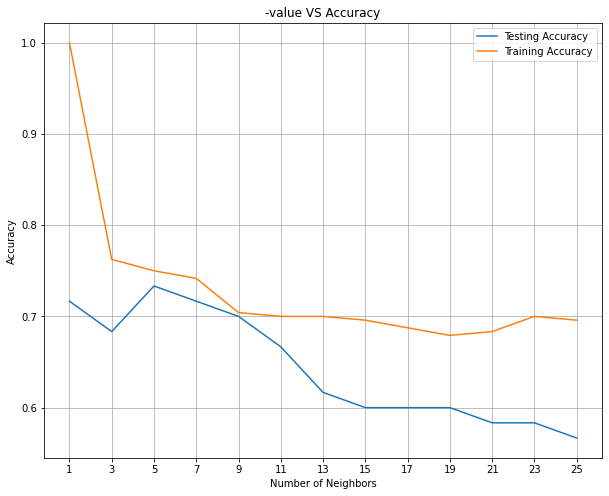


Nilai Akurasi terbaik untuk Model KNN adalah 0.73


In [ ]:
neig = np.arange(1, 26, 2)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  train_accuracy.append(knn.score(X_train, y_train))
  test_accuracy.append(knn.score(X_test, y_test))

plt.figure(figsize=[10,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.grid()
plt.show()
print("\nNilai Akurasi terbaik untuk Model KNN adalah {}".format(round(np.max(test_accuracy), 2)))

Nilai akurasi terbaik diperoleh dengan nilai K = 5

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


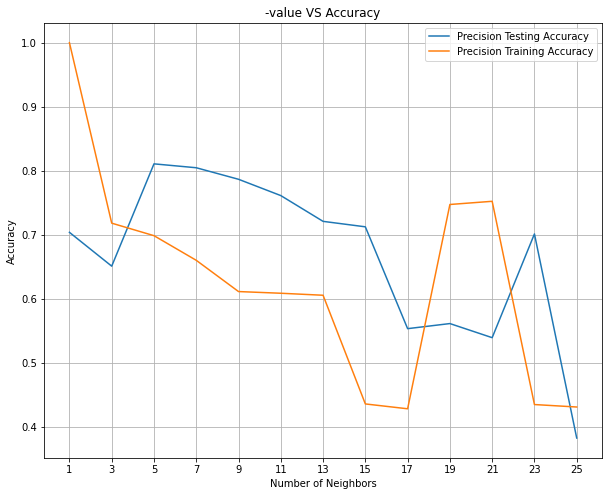


Nilai Precision terbaik untuk Model KNN adalah 0.81


In [ ]:
neig = np.arange(1, 26, 2)
precision_train_accuracy = []
precision_test_accuracy = []

for i, k in enumerate(neig):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  prediksi_knn_train = knn.predict(X_train)
  prediksi_knn_test = knn.predict(X_test)
  precision_train_accuracy.append(precision_score(y_train, prediksi_knn_train, average='macro'))
  precision_test_accuracy.append(precision_score(y_test, prediksi_knn_test, average='macro'))

plt.figure(figsize=[10,8])
plt.plot(neig, precision_test_accuracy, label = 'Precision Testing Accuracy')
plt.plot(neig, precision_train_accuracy, label = 'Precision Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.grid()
plt.show()
print("\nNilai Precision terbaik untuk Model KNN adalah {}".format(round(np.max(precision_test_accuracy), 2)))

Nilai precision terbaik diperoleh dengan nilai K = 5

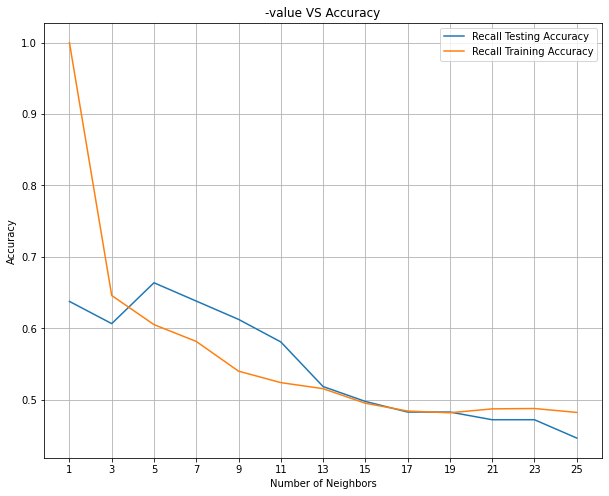


Nilai Recall Score terbaik untuk Model KNN adalah 0.66


In [ ]:
neig = np.arange(1, 26, 2)
recall_train_accuracy = []
recall_test_accuracy = []

for i, k in enumerate(neig):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  prediksi_knn_train = knn.predict(X_train)
  prediksi_knn_test = knn.predict(X_test)
  recall_train_accuracy.append(recall_score(y_train, prediksi_knn_train, average='macro'))
  recall_test_accuracy.append(recall_score(y_test, prediksi_knn_test, average='macro'))

plt.figure(figsize=[10,8])
plt.plot(neig, recall_test_accuracy, label = 'Recall Testing Accuracy')
plt.plot(neig, recall_train_accuracy, label = 'Recall Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.grid()
plt.show()
print("\nNilai Recall Score terbaik untuk Model KNN adalah {}".format(round(np.max(recall_test_accuracy),2)))

Nilai Recall terbaik diperoleh dengan nilai K = 5

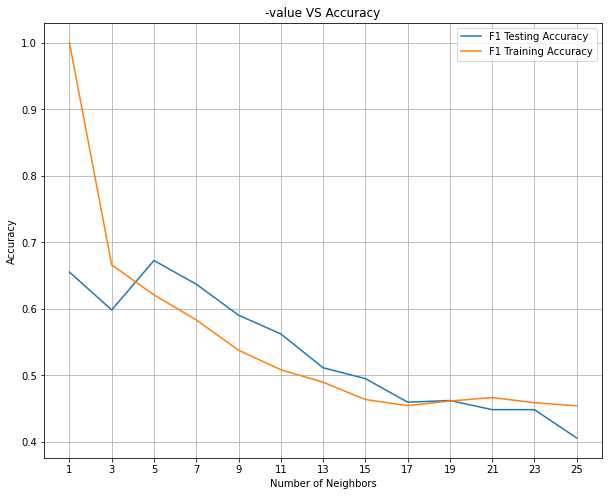


Nilai F1 Score terbaik untuk Model KNN adalah 0.67


In [ ]:
neig = np.arange(1, 26, 2)
f1_train_accuracy = []
f1_test_accuracy = []

for i, k in enumerate(neig):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  prediksi_knn_train = knn.predict(X_train)
  prediksi_knn_test = knn.predict(X_test)
  f1_train_accuracy.append(f1_score(y_train, prediksi_knn_train, average='macro'))
  f1_test_accuracy.append(f1_score(y_test, prediksi_knn_test, average='macro'))

plt.figure(figsize=[10,8])
plt.plot(neig, f1_test_accuracy, label = 'F1 Testing Accuracy')
plt.plot(neig, f1_train_accuracy, label = 'F1 Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.grid()
plt.show()
print("\nNilai F1 Score terbaik untuk Model KNN adalah {}".format(round(np.max(f1_test_accuracy),2)))

Nilai F1 terbaik diperoleh dengan nilai K = 5

**Random Forest**

dengan hyperparamter tuning

In [ ]:
estimator = [50, 100, 200, 300]
for i in estimator:
  rf = RandomForestClassifier(n_estimators=i, max_depth=5)
  rf.fit(X_train, y_train)
  prediksi_rf = rf.predict(X_train)
  prediksi_rf_test = rf.predict(X_test)
  y_pred_rf = rf.predict(X_test)
  cm = confusion_matrix(y_test, y_pred_rf)
  print('Nilai Akurasi Random Forest pada Training Set dengan n_estimator = {}'.format(i), 'adalah', round(accuracy_score(prediksi_rf, y_train), 2))
  print('Nilai Akurasi Random Forest pada Testing Set dengan n_estimator = {}'.format(i), 'adalah', round(accuracy_score(prediksi_rf_test, y_test), 2))
  print('Precision Score dengan n_estimator = {} adalah {}'.format(i, precision_score(y_test, y_pred_rf, average='macro')))
  print('F1 Score dengan n_estimator = {} adalah {}'.format(i, f1_score(y_test, y_pred_rf, average='macro')))
  print('Recall Score dengan n_estimator = {} adalah {}'.format(i, recall_score(y_test, y_pred_rf, average='macro')))
  #print(classification_report(y_test, y_pred_rf))
  #print(cm)
  print('=======================================================================================================================================')

Nilai Akurasi Random Forest pada Training Set dengan n_estimator = 50 adalah 0.87
Nilai Akurasi Random Forest pada Testing Set dengan n_estimator = 50 adalah 0.68
Precision Score dengan n_estimator = 50 adalah 0.8100529100529101
F1 Score dengan n_estimator = 50 adalah 0.5464494569757727
Recall Score dengan n_estimator = 50 adalah 0.5666356492969397
Nilai Akurasi Random Forest pada Training Set dengan n_estimator = 100 adalah 0.87
Nilai Akurasi Random Forest pada Testing Set dengan n_estimator = 100 adalah 0.67
Precision Score dengan n_estimator = 100 adalah 0.4720496894409938
F1 Score dengan n_estimator = 100 adalah 0.49552669552669554
Recall Score dengan n_estimator = 100 adalah 0.540994623655914


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Nilai Akurasi Random Forest pada Training Set dengan n_estimator = 200 adalah 0.88
Nilai Akurasi Random Forest pada Testing Set dengan n_estimator = 200 adalah 0.65
Precision Score dengan n_estimator = 200 adalah 0.8074494949494949
F1 Score dengan n_estimator = 200 adalah 0.5145670082378943
Recall Score dengan n_estimator = 200 adalah 0.5249689826302729
Nilai Akurasi Random Forest pada Training Set dengan n_estimator = 300 adalah 0.88
Nilai Akurasi Random Forest pada Testing Set dengan n_estimator = 300 adalah 0.68
Precision Score dengan n_estimator = 300 adalah 0.49585921325051757
F1 Score dengan n_estimator = 300 adalah 0.5177489177489177
Recall Score dengan n_estimator = 300 adalah 0.5618279569892474


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**KNN**
1. Nilai Akurasi terbaik untuk Model KNN adalah **0.73**
2. Nilai Precision terbaik untuk Model KNN adalah **0.81**
3. Nilai Recall Score terbaik untuk Model KNN adalah **0.66**
4. Nilai F1 Score terbaik untuk Model KNN adalah **0.67**

**SVC**
1. Nilai Akurasi SVC pada Testing Set dengan Kernel = rbf adalah 0.65
2. Precision Score kernel = rbf adalah 0.44459644322845415
3. F1 Score kernel = rbf adalah 0.48566748566748563
4. Recall Score kernel = rbf adalah 0.5403225806451614

**Random Forest**
1. Nilai Akurasi Random Forest pada Testing Set dengan n_estimator = 50 adalah 0.68
2. Precision Score dengan n_estimator = 50 adalah **0.8100529100529101**
3. F1 Score dengan n_estimator = 50 adalah 0.5464494569757727
4. Recall Score dengan n_estimator = 50 adalah 0.5666356492969397


Nilai akurasi, recall, dan f1 score tertinggi diperoleh dengan model KNN, sementara itu nilai precision score tertinggi diperoleh dengan model KNN dan Random Forest

## **Dataset Abalone**

In [ ]:
import os
print('\n'.join(os.listdir(r'./drive/My Drive/Colab Test (Bootcamp ML 2020)/Quiz')))

breast-cancer-wisconsin.xlsx
cancer.csv
breast-cancer-wisconsin.csv
breast-cancer-wisconsin.names
banknote.csv
banknote.names
Quiz_A.ipynb
.DS_Store
banknote.xlsx
columns banknote.csv
horse-colic - horse-colic.csv
abalone.csv


In [ ]:
df = pd.read_csv(r'./drive/My Drive/Colab Test (Bootcamp ML 2020)/Quiz/abalone.csv', names=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'])
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
print(df.isnull().sum())
print('\nTerdapat {} Missing Values pada Dataset'.format(df.isnull().sum().sum()))

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Terdapat 0 Missing Values pada Dataset


In [ ]:
df.shape

(4177, 9)

In [ ]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [ ]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


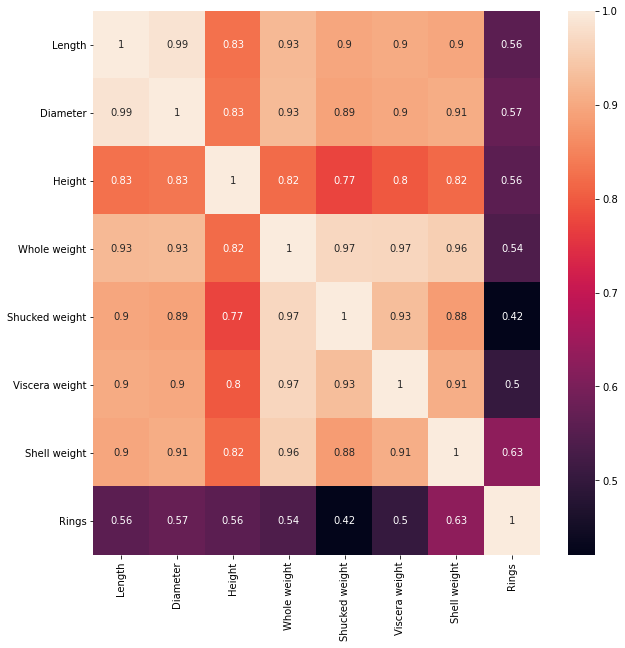

In [ ]:
#Cek korelasi antar atribut terhadap targetnya
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, annot_kws={'size':10})
plt.show()

In [ ]:
#drop kolom sex
df.drop(columns='Sex', axis=1, inplace=True)
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


**Machine Learning Model**

**Data Preprocessing**

In [ ]:
#Akan digunakan 3 algoritma
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
X = df.drop(['Rings'], axis=1)
y = df['Rings']

In [ ]:
stdr = StandardScaler()
powbox = PowerTransformer(method='yeo-johnson', standardize=True)
X_stdr = stdr.fit_transform(X.values)
y_stdr = stdr.fit_transform(df['Rings'].values.reshape(-1, 1)).flatten()

X_powbox = powbox.fit_transform(X.values)
y_powbox = powbox.fit_transform(df['Rings'].values.reshape(-1, 1)).flatten()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_powbox, y_powbox, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3341, 7), (836, 7), (3341,), (836,))

**Linear Regression**

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
prediksi_linreg = linreg.predict(X_test)

In [ ]:
linreg = LinearRegression(normalize=True)
linreg.fit(X_train, y_train)
prediksi_linreg = linreg.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, prediksi_linreg)
mae = mean_absolute_error(y_test, prediksi_linreg)
r2 = r2_score(y_test, prediksi_linreg)
print('MSE (Mean Squared Error) Using Power Transformers is  :', mse)
print('MAE (Mean Absolute Error) Using Power Transformers is :', mae)
print('r^2 score Using Standard Scaler is                 :', r2)
print('RMSE (Root Mean Squared Error) is                  :', np.sqrt(mean_squared_error(y_test, prediksi_linreg)))

MSE (Mean Squared Error) Using Power Transformers is  : 0.4220685848869214
MAE (Mean Absolute Error) Using Power Transformers is : 0.5049691757104534
r^2 score Using Standard Scaler is                 : 0.5940998587867343
RMSE (Root Mean Squared Error) is                  : 0.6496680574623639


**SVR**

In [ ]:
#Lakukan hyperparameter tuning
types = ['rbf', 'poly', 'linear']
for i in types:
  svr = SVR(kernel=i)
  svr.fit(X_train, y_train)
  prediksi_svr = svr.predict(X_train)
  prediksi_svr_test = svr.predict(X_test)
  mse = mean_squared_error(y_test, prediksi_svr_test)
  mae = mean_absolute_error(y_test, prediksi_svr_test)
  r2 = r2_score(y_test, prediksi_svr_test)
  print('MSE (Mean Squared Error) Using Power Transformers is  :', mse)
  print('MAE (Mean Absolute Error) Using Power Transformers is :', mae)
  print('r^2 score Using Standard Scaler is                 :', r2)
  print('Nilai RMSE SVC dengan Kernel = {} adalah {}'.format(i, np.sqrt(mean_squared_error(y_test, prediksi_svr_test))))
  print('========================================================================================================================')

MSE (Mean Squared Error) Using Power Transformers is  : 0.3711536421328578
MAE (Mean Absolute Error) Using Power Transformers is : 0.46248275280059964
r^2 score Using Standard Scaler is                 : 0.6430643711758205
Nilai RMSE SVC dengan Kernel = rbf adalah 0.6092238029926751
MSE (Mean Squared Error) Using Power Transformers is  : 0.596523689786514
MAE (Mean Absolute Error) Using Power Transformers is : 0.5654139059825111
r^2 score Using Standard Scaler is                 : 0.42632771404610836
Nilai RMSE SVC dengan Kernel = poly adalah 0.7723494609220065
MSE (Mean Squared Error) Using Power Transformers is  : 0.42272887446631
MAE (Mean Absolute Error) Using Power Transformers is : 0.5012193432943206
r^2 score Using Standard Scaler is                 : 0.5934648633307533
Nilai RMSE SVC dengan Kernel = linear adalah 0.6501760334450278


**XGBoost Regressor**

dengan hyperparameter tuning

In [ ]:
rating = [0.3, 0.03, 0.003, 0.0003]
for i in rating:
  xgb = XGBRegressor(objective='reg:squarederror', colsample_bytree=0.5, learning_rate=i, max_depth=4, alpha=10, n_estimators=1000)
  xgb.fit(X_train, y_train)
  prediksi_xgb = xgb.predict(X_train)
  prediksi_xgb_test = xgb.predict(X_test)
  r2 = r2_score(y_test, prediksi_xgb_test)
  mse = mean_squared_error(y_test, prediksi_xgb_test)
  mae = mean_absolute_error(y_test, prediksi_xgb_test)
  print('MSE (Mean Squared Error) Using Power Transformers is  :', mse)
  print('MAE (Mean Absolute Error) Using Power Transformers is :', mae)
  print('r^2 score Using Power Transformers is :', r2)
  print('Nilai RMSE XGBoost Regressor pada Testing Set dengan Learning Rate = {}'.format(i), 'adalah', np.sqrt(mean_squared_error(prediksi_xgb_test, y_test)))
  print('================================================================================================================================================================)')

MSE (Mean Squared Error) Using Power Transformers is  : 0.45459917056743326
MAE (Mean Absolute Error) Using Power Transformers is : 0.5146230568376727
r^2 score Using Power Transformers is : 0.5628154424755616
Nilai RMSE XGBoost Regressor pada Testing Set dengan Learning Rate = 0.3 adalah 0.6742396981544718
================================================================================================================================================================)
MSE (Mean Squared Error) Using Power Transformers is  : 0.39100911850486436
MAE (Mean Absolute Error) Using Power Transformers is : 0.4755898564040367
r^2 score Using Power Transformers is : 0.6239695108809864
Nilai RMSE XGBoost Regressor pada Testing Set dengan Learning Rate = 0.03 adalah 0.6253072192969343
================================================================================================================================================================)
MSE (Mean Squared Error) Using Power Transformers is  : 0

**SVR**

1. MSE (Mean Squared Error) Using Power Transformers is  : 0.3711536421328578
2. MAE (Mean Absolute Error) Using Power Transformers is : 0.46248275280059964
3. r^2 score Using Power Transformers is                 : **0.6430643711758205**
4. Nilai RMSE SVC dengan Kernel = rbf adalah **0.6092238029926751**

**Linear Regression**

1. MSE (Mean Squared Error) Using Power Transformers is  : 0.4220685848869214
2. MAE (Mean Absolute Error) Using Power Transformers is : 0.5049691757104534
3. r^2 score Using Power Transformers is                 : 0.5940998587867343
4. RMSE (Root Mean Squared Error) is                  : 0.6496680574623639

**XGBoost Regressor**
1. MSE (Mean Squared Error) Using Power Transformers is  : 0.39100911850486436
2. MAE (Mean Absolute Error) Using Power Transformers is : 0.4755898564040367
3. r^2 score Using Power Transformers is : 0.6239695108809864
4. Nilai RMSE XGBoost Regressor pada Testing Set dengan Learning Rate = 0.03 adalah 0.6253072192969343

Nilai R2 tertinggi dan RMSE terendah diperoleh dengan algoritma Support Vector Machine Regressor